# Histograms


(array([6.07759702e-05, 2.83621194e-04, 1.39784731e-03, 5.61164791e-03,
        1.96306384e-02, 5.22470757e-02, 1.17520468e-01, 2.10264598e-01,
        3.06351407e-01, 3.63035128e-01, 3.50434244e-01, 2.74221177e-01,
        1.75500743e-01, 9.33518902e-02, 3.79849814e-02, 1.29857990e-02,
        4.05173134e-03, 7.49570299e-04, 1.41810597e-04, 4.05173134e-05]),
 array([ 0.15026293,  0.64387908,  1.13749522,  1.63111136,  2.12472751,
         2.61834365,  3.11195979,  3.60557594,  4.09919208,  4.59280822,
         5.08642437,  5.58004051,  6.07365665,  6.5672728 ,  7.06088894,
         7.55450508,  8.04812123,  8.54173737,  9.03535351,  9.52896966,
        10.0225858 ]),
 <a list of 20 Patch objects>)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


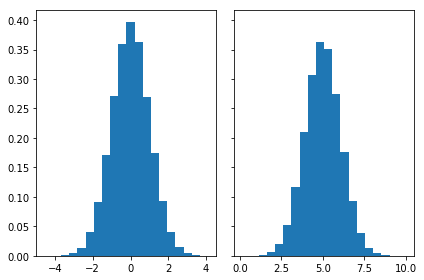

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 100000
bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=bins, density=True)
axs[1].hist(y, bins=bins, density=True)

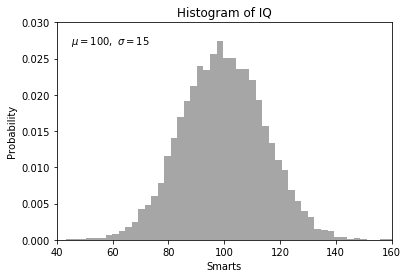

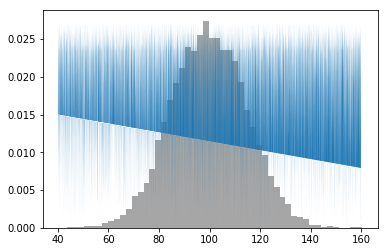

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
#n, bins, patches = 
plt.hist(x, 50, density=True, cumulative=False, facecolor='gray', alpha=0.7)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(45, .027, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(False)

a = np.concatenate((x[0:5000,],
                    x[5000:10000,]))[:, np.newaxis]

X_plot = np.linspace(40, 160, 10000)[:, np.newaxis]

from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(a)
log_dens = kde.score_samples(a)

fig, ax = plt.subplots()
ax.hist(x, 50, density=True, cumulative=False, facecolor='gray', alpha=0.7)
ax.fill(X_plot[:, 0], np.exp(log_dens))
#N = 20
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
 #                   np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]


# Nonparametric density functions

* Kernel density estimator of the density $f(x)$:
$$
\hat{f}_n(x)=\frac{1}{n\lambda}\sum_{i=1}^{n}K\left(\frac{x_i-x}{\lambda}\right) 
$$
where the kernel function $K:\mathbb{R}\to\mathbb{R}$ assigns a weight to $x_i$ based on its distance from $x$, and the $\lambda > 0$ parameter defines the width of the local neighborhood.

Kernel |$K(u)$
-|-
Rectangular | $\tfrac{1}{2}I(|u|\leq1)$
Triangular|$(1-|u|)I(|u|\leq1)$
Epanechnikov|$\tfrac{3}{4}\left(1-u^2\right) I(|u|\leq1)$
Biweight|$\tfrac{15}{16}\left(1-u^2\right)^2I(|u|\leq1)$
Triweight|$\tfrac{35}{32}\left(1-u^2\right)^3I(|u|\leq1)$
Gaussian|$\tfrac{1}{\sqrt{2\pi}}\exp\left(-u^2/2\right)$
Silverman|$\tfrac{1}{2}\exp\left(-|u|\sqrt{2}\right)\sin\left(|u|/\sqrt{2}+\pi/4\right)$
Cosine|$\tfrac{\pi}{4}\cos\left(\tfrac{\pi}{2}u\right)I(|u|\leq1)$

<img src='kernels.png' width='700' />


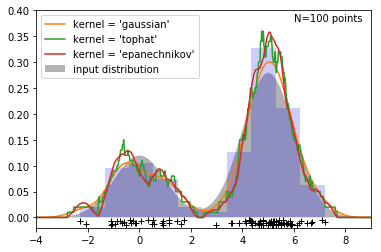

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.3,
        label='input distribution')

ax.hist(X, density=True, cumulative=False, facecolor='b', alpha=0.2)

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')


ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

# Box-plots

<img src='boxplot.png' width='700' />

# Violin plots

# Plots

In [ ]:
# basic line plot
import matplotlib.pyplot as plt
import numpy as np
myarray = np.array([1, 2, 3])
plt.plot(myarray)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()